In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from datetime import datetime
import seaborn as sns

In [2]:
# This turns all the axes white in all the matplotlib plots. Comment this out if you dont want that
COLOR = 'white'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR

In [3]:
df = pd.read_csv('/Users/nadeem/datasets/vehicleloan/train.csv')
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [69]:
df.dtypes

UNIQUEID                                 int64
DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
BRANCH_ID                                int64
SUPPLIER_ID                              int64
MANUFACTURER_ID                          int64
CURRENT_PINCODE_ID                       int64
DATE_OF_BIRTH                           object
EMPLOYMENT_TYPE                         object
DISBURSAL_DATE                          object
STATE_ID                                 int64
EMPLOYEE_CODE_ID                         int64
MOBILENO_AVL_FLAG                        int64
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACC

In [4]:
features = ['LOAN_DEFAULT', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES', 'DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']
df = df[features]
df.head()


,LOAN_DEFAULT,DISBURSED_AMOUNT,ASSET_COST,LTV,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0,50578,58400,89.55,0,0,0,0,0,0,0,01-01-1984,Salaried,03-08-2018,0yrs 0mon,0yrs 0mon
1,1,47145,65550,73.23,27600,50200,50200,1991,0,1,0,31-07-1985,Self employed,26-09-2018,1yrs 11mon,1yrs 11mon
2,0,53278,61360,89.63,0,0,0,0,0,0,0,24-08-1985,Self employed,01-08-2018,0yrs 0mon,0yrs 0mon
3,1,57513,66113,88.48,0,0,0,31,0,0,1,30-12-1993,Self employed,26-10-2018,0yrs 8mon,1yrs 3mon
4,1,52378,60300,88.39,0,0,0,0,0,0,1,09-12-1977,Self employed,26-09-2018,0yrs 0mon,0yrs 0mon


In [5]:
df.info

<bound method DataFrame.info of         LOAN_DEFAULT  DISBURSED_AMOUNT  ASSET_COST    LTV  \
0                  0             50578       58400  89.55   
1                  1             47145       65550  73.23   
2                  0             53278       61360  89.63   
3                  1             57513       66113  88.48   
4                  1             52378       60300  88.39   
...              ...               ...         ...    ...   
233149             0             63213      105405  60.72   
233150             0             73651      100600  74.95   
233151             0             33484       71212  48.45   
233152             0             34259       73286  49.10   
233153             0             75751      116009  66.81   

        PRI_CURRENT_BALANCE  PRI_SANCTIONED_AMOUNT  PRI_DISBURSED_AMOUNT  \
0                         0                      0                     0   
1                     27600                  50200                 50200   
2      

In [7]:
df = df.dropna()
df.head()

,LOAN_DEFAULT,DISBURSED_AMOUNT,ASSET_COST,LTV,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0,50578,58400,89.55,0,0,0,0,0,0,0,01-01-1984,Salaried,03-08-2018,0yrs 0mon,0yrs 0mon
1,1,47145,65550,73.23,27600,50200,50200,1991,0,1,0,31-07-1985,Self employed,26-09-2018,1yrs 11mon,1yrs 11mon
2,0,53278,61360,89.63,0,0,0,0,0,0,0,24-08-1985,Self employed,01-08-2018,0yrs 0mon,0yrs 0mon
3,1,57513,66113,88.48,0,0,0,31,0,0,1,30-12-1993,Self employed,26-10-2018,0yrs 8mon,1yrs 3mon
4,1,52378,60300,88.39,0,0,0,0,0,0,1,09-12-1977,Self employed,26-09-2018,0yrs 0mon,0yrs 0mon


In [72]:
df.shape

(225493, 16)

In [8]:
print(df.pivot_table(index = ['LOAN_DEFAULT'], aggfunc ='size'))

LOAN_DEFAULT
0    176526
1     48967
dtype: int64


In [9]:
df = df.iloc[:70000]

In [10]:
print(df.pivot_table(index = ['LOAN_DEFAULT'], aggfunc ='size'))

LOAN_DEFAULT
0    55847
1    14153
dtype: int64


In [11]:
# make a correlation matrix to check which variables to drop.
corr_matrix = df.corr()
print (corr_matrix)
# PRI_SANCTIONED_AMOUNT and PRI_DISBURSED_AMOUNT are highly correlated - taking out sanctioned amount as that is just total amount that can be 
# lended but is not really lended.
# ASSET_COST and DISBURSED_AMOUNT are highly correlated - taking out disbursed amount as pri_disbursed_amount is there.

                                     LOAN_DEFAULT  DISBURSED_AMOUNT  \
LOAN_DEFAULT                             1.000000          0.086263   
DISBURSED_AMOUNT                         0.086263          1.000000   
ASSET_COST                               0.018272          0.698144   
LTV                                      0.095711          0.451751   
PRI_CURRENT_BALANCE                     -0.024828          0.014234   
PRI_SANCTIONED_AMOUNT                   -0.001320          0.002703   
PRI_DISBURSED_AMOUNT                    -0.001316          0.002656   
PRIMARY_INSTAL_AMT                      -0.009497          0.004277   
NEW_ACCTS_IN_LAST_SIX_MONTHS            -0.022033          0.037119   
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS      0.033490          0.018026   
NO_OF_INQUIRIES                          0.044245          0.032009   

                                     ASSET_COST       LTV  \
LOAN_DEFAULT                           0.018272  0.095711   
DISBURSED_AMOUNT         

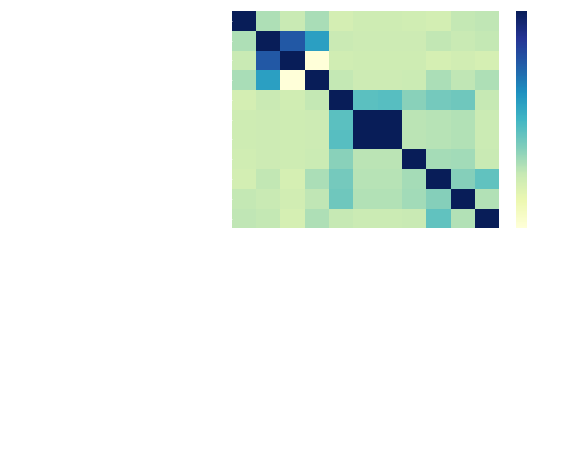

In [17]:
sns.heatmap(corr_matrix, cmap="YlGnBu")

# Displaying the heatmap
plt.show()

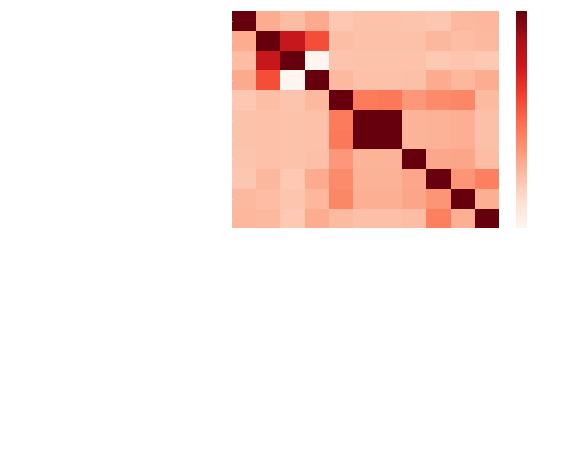

In [15]:
sns.heatmap(corr_matrix, cmap="Reds")

# Display the heatmap
plt.show()

In [18]:
features = ['LOAN_DEFAULT', 'ASSET_COST', 'LTV', 'PRI_CURRENT_BALANCE', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES', 'DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']
df = df[features]
df.dtypes
# removed disbursed_amount and pri_sanctioned_amount

LOAN_DEFAULT                             int64
ASSET_COST                               int64
LTV                                    float64
PRI_CURRENT_BALANCE                      int64
PRI_DISBURSED_AMOUNT                     int64
PRIMARY_INSTAL_AMT                       int64
NEW_ACCTS_IN_LAST_SIX_MONTHS             int64
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS      int64
NO_OF_INQUIRIES                          int64
DATE_OF_BIRTH                           object
EMPLOYMENT_TYPE                         object
DISBURSAL_DATE                          object
AVERAGE_ACCT_AGE                        object
CREDIT_HISTORY_LENGTH                   object
dtype: object

In [19]:
df.head()

,LOAN_DEFAULT,ASSET_COST,LTV,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0,58400,89.55,0,0,0,0,0,0,01-01-1984,Salaried,03-08-2018,0yrs 0mon,0yrs 0mon
1,1,65550,73.23,27600,50200,1991,0,1,0,31-07-1985,Self employed,26-09-2018,1yrs 11mon,1yrs 11mon
2,0,61360,89.63,0,0,0,0,0,0,24-08-1985,Self employed,01-08-2018,0yrs 0mon,0yrs 0mon
3,1,66113,88.48,0,0,31,0,0,1,30-12-1993,Self employed,26-10-2018,0yrs 8mon,1yrs 3mon
4,1,60300,88.39,0,0,0,0,0,1,09-12-1977,Self employed,26-09-2018,0yrs 0mon,0yrs 0mon


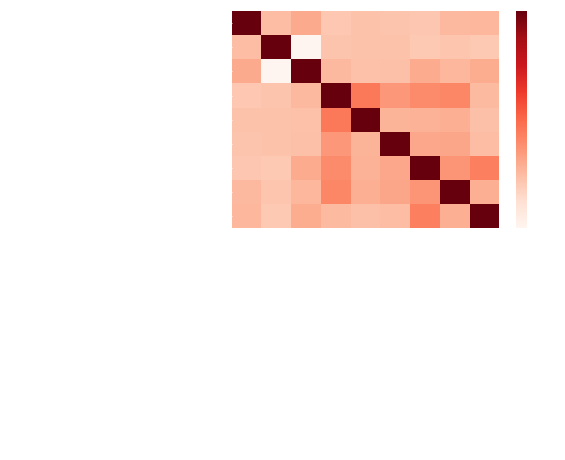

In [21]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="Reds")

# Display the heatmap
plt.show()

In [22]:
target = 'LOAN_DEFAULT'
cat = ['DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']
num = ['ASSET_COST', 'LTV', 'PRI_CURRENT_BALANCE', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES']

In [23]:
y = df[target].values

x_cat = df.filter(items = cat).values
x_num = df.filter(items = num).values

labelencoder_X = LabelEncoder()
for i in range(len(cat)): 
    x_cat[:, i] = labelencoder_X.fit_transform(x_cat[:, i])
    
X = np.concatenate((x_cat, x_num), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [24]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
svc_linear = SVC(C=1.0, random_state=1, kernel='linear')

In [26]:
svc_linear.fit(X_train_std, y_train) # confusion matrix # cut no of rows # 565 mins for 100,000, 50,000 ran but gave accuracy of 72%

SVC(kernel='linear', random_state=1)

In [27]:
y_predict_linear = svc_linear.predict(X_test_std)

In [29]:
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict_linear))

Accuracy score 0.798


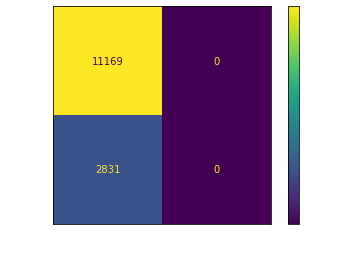

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict_linear)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
# model is overfitting, change kernel